# Проект "Статистический анализ данных"
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.  
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением, в котором есть вариант подписки.

__Цель исследования:__  
Проверить ряд гипотез об использовании приложения пользователей с подпиской и без нее  

__Ход исследования:__  
Получаем данные из файлов: 'users_go.csv','rides_go.csv' и 'subscriptions_go.csv' и проверяем их на пропуски. Предобрабатываем данные, избавляя их от дубликатов и изменяя тип в столбцах на нужный. Исследуем распределения данные для понимания общей картины и поиска точек роста для бизнеса. Объединяем и строим агрегирующие таблицы, с помощью которых находим выручку для разных групп пользователей. Проверяем гипотезы и ,наконец, пишем выводы и рекомендации.  
Таким образом, мое исследование пройдет в 7 этапов:
- Обзор данных
- Предобработка данных
- Исследовательский анализ данных
- Объединение данных
- Подсчет выручки
- Проверка гипотез
- Заключение

## Исходные данные

In [1]:
# подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import random as rn
from scipy import stats as st

In [2]:
# прочитаем csv файлы
try:
    users = pd.read_csv('users_go.csv')
    rides = pd.read_csv('rides_go.csv')
    subscriptions = pd.read_csv('subscriptions_go.csv')
except:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
# выведем первые строки и общую информацию для каждого датафрейма
display(users.head())
users.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
display(rides.head())
rides.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [5]:
display(subscriptions.head())
subscriptions.info()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


__Выводы__  
В данной части проекта были выгруженные исходные данные. В результате также было установлено отсутствие пустые строк в данных датафреймах

## Предобработка данных

In [6]:
# приводим стобец date к типу даты pandas
rides['date'] = pd.to_datetime(rides['date'])
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [7]:
# создаем новый стобец с номером месяца
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [8]:
#  еще раз проверим пропущенные значения в датафреймах
users.info()
rides.info()
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB
<class 'panda

### Проверка на дубликаты

In [9]:
# проверим на явные дубликаты и удалим их при обнаружении
print('users =', users.duplicated().sum())
users = users.drop_duplicates()

print('rides = ',rides.duplicated().sum())

print('subscriptions = ',subscriptions.duplicated().sum())

users = 31
rides =  0
subscriptions =  0


In [10]:
# проверим неявные дубликаты
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [11]:
users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [12]:
print(len(users['name'].unique()))
users['name'] = users['name'].replace('ё','е')
len(users['name'].unique())

194


194

__Выводы__  
В данной части проекта были решены следующие задачи:
* добавлен новый столбец с номером месяца month
* данные были проверены на пропуски и дубликаты, в результате чего из users было удалено 31 явный дубликат

## Исследовательский анализ данных

In [13]:
def count_plot(x,data,order,title='Название',ylabel='Y',xlabel='X'):
    plt.figure(figsize=(15,5))
    sns.countplot(x=x, data=data, palette=['#F0E68C','#bdb76b'],order = order)
    plt.title(title,fontsize=18);
    plt.ylabel(ylabel,fontsize=14)
    plt.xlabel(xlabel,fontsize=14)
    plt.show()
    display(data[x].describe())

def graf_ik_pie(c,data=users,tr=False,h=5,w=15):
    
    data_p = [len(data[data['chain']==0]),len(data[data['chain'] == 1])]
    labels = ['Не в сети','Сетевое']
    plt.figure(figsize=(w,h))

    plt.pie(x=data_p,labels=labels, autopct='%1.1f%%',colors=['khaki','darkkhaki'])

    plt.title(c,fontsize=18)

    plt.show()

def histplot(x,bins=50,title='Название',ylabel='Y',xlabel='X'):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(15,5))

    sns.boxplot(x=x, ax=ax_box,color='khaki')
    sns.histplot(x=x,bins=bins,color='darkkhaki',kde=True,ax=ax_hist)

    ax_box.set_xlabel('')
    
    plt.suptitle(title,fontsize=18);
    plt.ylabel(ylabel,fontsize=14)
    plt.xlabel(xlabel,fontsize=14)
    plt.show()
    display(x.describe())

### Частота встречаемости городов

In [14]:
users_city_top = users['city'].value_counts().sort_values(ascending=False)

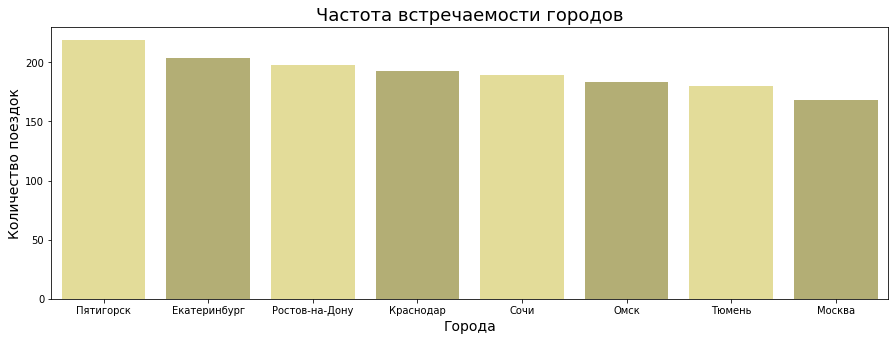

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

In [15]:
count_plot(x='city',data=users,order=users['city'].value_counts().index,
           title='Частота встречаемости городов', ylabel='Количество поездок',
           xlabel='Города')

В топ 3 городов по количеству поездок входят Пятигорск, Екатеринбург и Ростов-на-Дону

### Соотношение пользователей с подпиской и без подписки

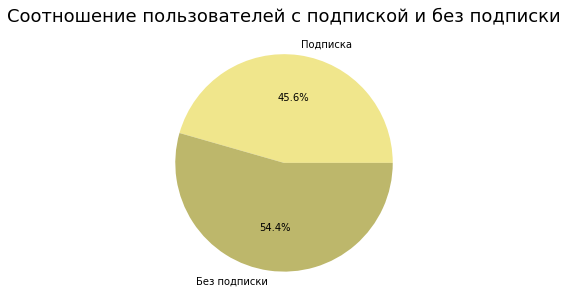

In [16]:
data_p = [len(users[users['subscription_type']=='ultra']),len(users[users['subscription_type'] != 'ultra'])]
labels = ['Подписка','Без подписки']
plt.figure(figsize=(15,5))

plt.pie(x=data_p,labels=labels, autopct='%1.1f%%',colors=['khaki','darkkhaki'])

plt.title('Соотношение пользователей с подпиской и без подписки',fontsize=18)

plt.show()

В целом, количество пользователей с подпиской и без примерно одинаковое (с небольшим перевесом в пользу отсутствия подписки)

### Возраст пользователей

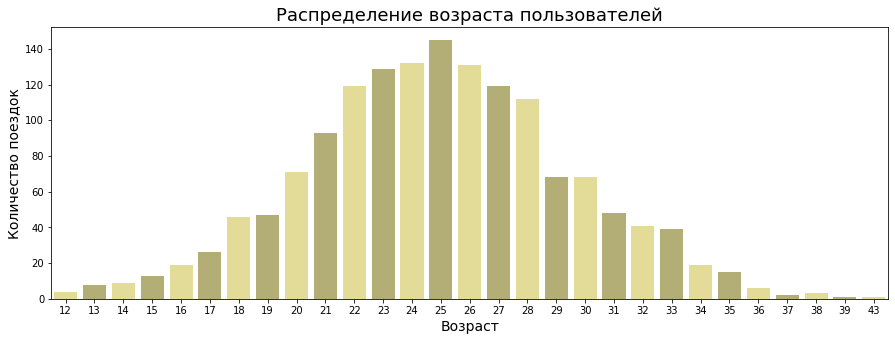

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [17]:
count_plot(x='age',data=users,order=None,title='Распределение возраста пользователей', 
           ylabel='Количество поездок', xlabel='Возраст')

Распределение возраста пользователей представляет собой классический колокол нормального распределения с центром в 25 лет. Аномалий в распределении не обнаружено

### Расстояние, которое пользователь преодолел за одну поездку

In [18]:
# обработаем стобец с растоянием поездок, округляя значения до десятков
rides['distance'] = rides['distance'].apply(lambda x: round(x/10,0) * 10)

In [19]:
rides['distance'] = rides['distance'].replace([np.inf, -np.inf], np.nan)

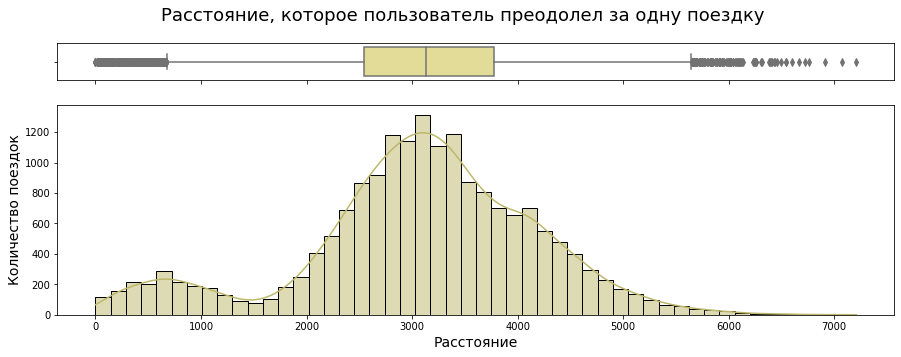

count    18068.000000
mean      3070.648661
std       1116.847321
min          0.000000
25%       2540.000000
50%       3130.000000
75%       3780.000000
max       7210.000000
Name: distance, dtype: float64

In [20]:
histplot(x=rides['distance'],title='Расстояние, которое пользователь преодолел за одну поездку',
         ylabel='Количество поездок',xlabel='Расстояние')

Распределение расстояния за одну поездку представляет собой нормальное распределение с центром в отметке 3130 метров. Также есть нобольшой колокол в районе 550-600 метров (возможно, поездки до станций метро или автобусних остановок до дома/работы). Есть небольшое количество выбивающихся значений свыше 6000 метров

### Продолжительность поездок

In [21]:
# Округлим продожитенльность поездок до целых
rides['duration'] = round(rides['duration'],0)

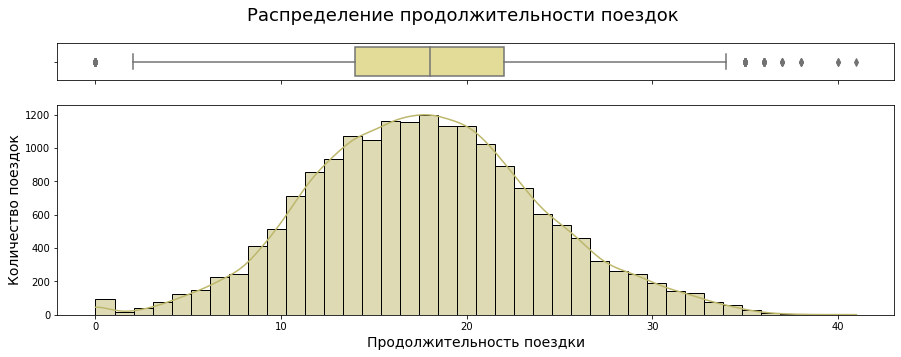

count    18068.000000
mean        17.803852
std          6.104153
min          0.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

In [22]:
histplot(x=rides['duration'],bins=40,title='Распределение продолжительности поездок',
         ylabel='Количество поездок',xlabel='Продолжительность поездки')

Распределение продолжительности поездки - нормальное распределение с центром в 18 минутах

__Выводы__
В данной части проекта были решены следующие задачи:
* Самым популярным по количеству поездок городом является Пятигорск
* Пользователи без подписки являются большинством (54%)
* Средним воздрастом пользователя является 25 лет
* Среднее расстояние поездки 3130 метров
* Средняя продолжительность поездки 18 минут

## Объединение данных

In [23]:
# выведем размеры объединяемых датафреймов
print('rides: ', len(rides))
print('users: ', len(users))
print('subscriptions: ', len(subscriptions))

rides:  18068
users:  1534
subscriptions:  2


In [24]:
# Объединим все датафреймы
rides = rides.merge(users, on='user_id')
data = rides.merge(subscriptions, on='subscription_type')
# Проверим
# выведем 
if len(data) == len(rides):
    print('размеры объединенного и исходного датафрейма совпадают и равны ', len(data))
else:
    print('ошибка при объединении')
data.head()

размеры объединенного и исходного датафрейма совпадают и равны  18068


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4410.0,26.0,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2620.0,16.0,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,750.0,6.0,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2690.0,19.0,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4030.0,26.0,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [25]:
# Создаем 2 датафрейма с разными типами подписок
data_ultra = data.query('subscription_type == "ultra"')
data_free = data.query('subscription_type != "ultra"')

display(data_ultra.head())
display(data_free.head())

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4410.0,26.0,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2620.0,16.0,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,750.0,6.0,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2690.0,19.0,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4030.0,26.0,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2520.0,15.0,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,850.0,16.0,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4000.0,20.0,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1210.0,10.0,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3050.0,17.0,2021-02-14,2,Айдар,22,Омск,free,8,50,0


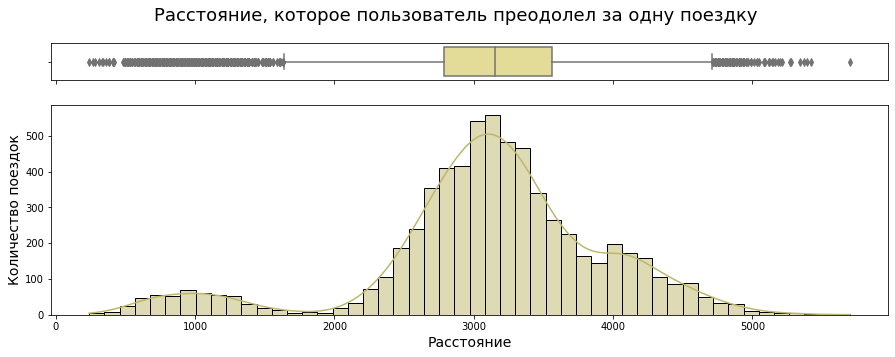

count    6500.000000
mean     3115.418462
std       836.901498
min       240.000000
25%      2790.000000
50%      3150.000000
75%      3560.000000
max      5700.000000
Name: distance, dtype: float64

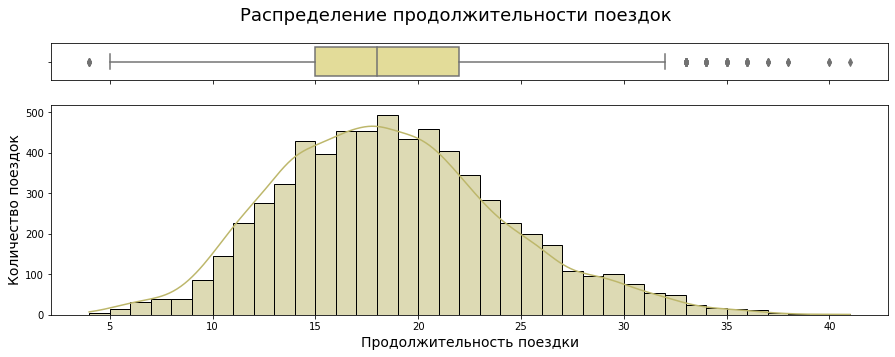

count    6500.000000
mean       18.549231
std         5.575445
min         4.000000
25%        15.000000
50%        18.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

In [26]:
# Визуализируем информацию о расстоянии и времени поездок для каждой группы
# Пользователи с подпиской
histplot(x=data_ultra['distance'],title='Расстояние, которое пользователь преодолел за одну поездку',
         ylabel='Количество поездок',xlabel='Расстояние')

histplot(x=data_ultra['duration'],bins=37,title='Распределение продолжительности поездок',
         ylabel='Количество поездок',xlabel='Продолжительность поездки')

Расстояние для пользователей с подпиской распределено по схеме нормамального распределение с центром в отметке 3150 метров. При этом после расстояния в 4700 метров количество поездок резко сокращается

Продолжительность поездки также распределена нормально с центром в 18 минут. После отметки в 32 поездок крайне мало

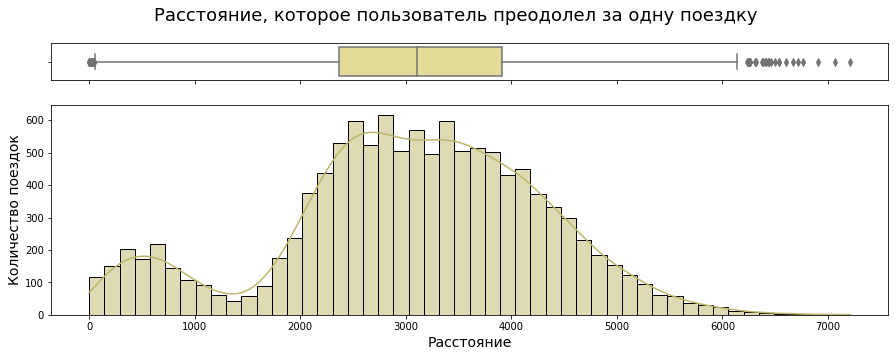

count    11568.000000
mean      3045.492739
std       1246.194525
min          0.000000
25%       2370.000000
50%       3110.000000
75%       3910.000000
max       7210.000000
Name: distance, dtype: float64

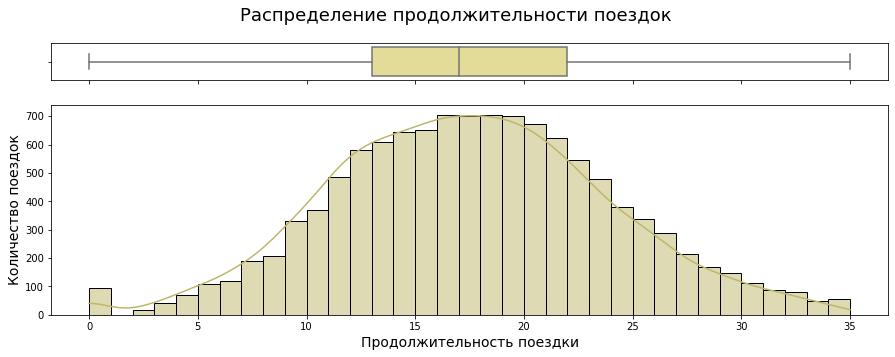

count    11568.000000
mean        17.385028
std          6.343957
min          0.000000
25%         13.000000
50%         17.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

In [27]:
# Пользователи без подписки
histplot(x=data_free['distance'],title='Расстояние, которое пользователь преодолел за одну поездку',
         ylabel='Количество поездок',xlabel='Расстояние')

histplot(x=data_free['duration'],bins=35,title='Распределение продолжительности поездок',
         ylabel='Количество поездок',xlabel='Продолжительность поездки')

Расстояние для пользователей без подпиской распределено по схеме нормамального распределение с центром в отметке 3110 метров. Второй колокол в районе до 1000 метров становится отчетливее. При этом после расстояния в 6000 метров количество поездок резко сокращается

Продолжительность поездки также распределена нормально с центром в 17 минут. Аномалий не обнаружено

__Выводы__  
В данной части проекта были решены следующие задачи:
* Все исходные датафремы были объеденены в один
* На основе этого датафрейма было созданы датафреймы для пользователей с подпиской и без нее
* были визуализированы распределения расстояний и времени поездки для каждой из групп пользователей

## Подсчет выручки

In [28]:
# округлим время поездки в большую сторону
data_free['duration'] = data_free['duration'].apply(math.ceil)
data_ultra['duration'] = data_ultra['duration'].apply(math.ceil)

# создадим 2 датафрейма с агрегированными данными о поездках для разных групп пользователей
data_gr_free = data_free.groupby(['user_id','month']).agg({'duration':'sum','distance':'sum','age':'count'}).reset_index()
data_gr_free = data_gr_free.rename(columns={'age':'count_of_rides'})

data_gr_ultra = data_ultra.groupby(['user_id','month']).agg({'duration':'sum','distance':'sum','age':'count'}).reset_index()
data_gr_ultra = data_gr_ultra.rename(columns={'age':'count_of_rides'})

/tmp/ipykernel_86/2166490091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_free['duration'] = data_free['duration'].apply(math.ceil)
/tmp/ipykernel_86/2166490091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ultra['duration'] = data_ultra['duration'].apply(math.ceil)


In [29]:
# Проверим получившиеся датафреймы на пропуски
display(data_gr_free.info())
display(data_gr_ultra.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         6798 non-null   int64  
 1   month           6798 non-null   int64  
 2   duration        6798 non-null   int64  
 3   distance        6798 non-null   float64
 4   count_of_rides  6798 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 265.7 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4533 entries, 0 to 4532
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         4533 non-null   int64  
 1   month           4533 non-null   int64  
 2   duration        4533 non-null   int64  
 3   distance        4533 non-null   float64
 4   count_of_rides  4533 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 177.2 KB


None

Пустых строк не обнаружено

In [30]:
# добавим столбец с помесячной выручкой
# проверим, изменяли ли пользователи статус подписки в течении сбора данных
# для этого создадим списки уникальных пользователей и найдем их пересечение
us_id_free = data_free['user_id'].unique()
us_id_ultra = data_ultra['user_id'].unique()

pr_list = list(set(us_id_free) & set(us_id_ultra))
if len(pr_list) == 0:
    print('Пересечений не найдено')
else:
    print('Пересечения есть(')

Пересечений не найдено


In [31]:
# создадим функцию для подсчета ежемесячной выручки для каждого пользователя
def rev(dt):
    if dt['user_id'] in us_id_free: # проверим подписку пользователя
        a = dt['count_of_rides'] * 50 # стоимость начала поездки
        b = dt['duration'] * 8 # стоимость минуты
        rev = math.ceil(a + b) # месячная выручка
    else:
        a = 0 # стоимость начала поездки
        b = dt['duration'] * 6 # стоимость минуты
        c = 199 # стоимость подписки
        rev = math.ceil(a + b + c) # месячная выручка
    return(rev)

In [32]:
# создадим столбец с выручкой
data_gr_free['revenue'] = data_gr_free.apply(rev,axis=1)
data_gr_free.head()

,user_id,month,duration,distance,count_of_rides,revenue
0,700,1,15,2520.0,1,170
1,700,2,85,13450.0,5,930
2,700,3,18,3800.0,1,194
3,700,4,15,2980.0,1,170
4,700,6,28,5930.0,2,324


In [33]:
data_gr_ultra['revenue'] = data_gr_ultra.apply(rev,axis=1)
data_gr_ultra.head()

,user_id,month,duration,distance,count_of_rides,revenue
0,1,1,42,7030.0,2,451
1,1,4,6,750.0,1,235
2,1,8,45,6720.0,2,469
3,1,10,32,5810.0,2,391
4,1,11,53,7000.0,3,517


__Выводы__  
В результате данной части проекта:
* было создано 2 датафрейма с агрегированными данными о поездках(помесячно для каждого пользователя)
* в каждый из них добавлен стобец с выручкой revenue

## Проверка гипотез

### Первая гипотеза

__Исходный запрос:__  
Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Ho: пользователи с подпиской и без нее тратят одинаковое количество времени на поездки  
H1: пользователи с подпиской тратят больше времени, чем без нее

In [34]:
# зададим уровень статистической значимости
alpha = .01
# Проверим гипотезу
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.1600689435611813e-35
Отвергаем нулевую гипотезу


Вероятность того, что пользователи с подпиской тратят больше времени в поездках, достаточно велика

### Вторая гипотеза

__Исходный запрос:__  
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Ho: среднее расстояние которое проезжают пользователи с подпиской = 3130  
H1: среднее расстояние которое проезжают пользователи с подпиской больше 3130

In [35]:
# пороговое значение
value_1 = 3130
# зададим уровень статистической значимости
alpha = .01
# Проверим гипотезу
results = st.ttest_1samp(
    data_ultra['distance'], 
    value_1,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9199218607432156
Не отвергаем нулевую гипотезу


In [36]:
null_hypothesis = 3130

results = st.ttest_1samp(data_ultra['distance'], null_hypothesis, alternative='greater')

print('p-value', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую")
else:
    print("Опровергнуть нулевую гипотезу нельзя")




p-value 0.9199218607432156
Опровергнуть нулевую гипотезу нельзя


Вероятность того что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров, достаточно велика

### Третья гипотеза

__Исходный запрос:__  
Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Ho: помесячная выручка от пользователей с подпиской и без равны  
H1: помесячная выручка от пользователей с подпиской больше чем без нее

In [37]:
# зададим уровень статистической значимости
alpha = .01
# Проверим гипотезу
results = st.ttest_ind(data_gr_ultra['revenue'], data_gr_free['revenue'], alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть гипотезу') 

p-значение: 1.7274069878387966e-37
Отвергаем нулевую гипотезу


Вероятность того, что выручка от пользователей с подпиской больше, довольно высока

### Четвертая гипотеза

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки данной гипотезы целессобразным будет использование метода __scipy.stats.ttest_rel()__, так как выборки будут являться созависимыми

__Выводы__  
В данной части проекта было проверено несколько гипотез:
* Вероятность того, что пользователи с подпиской тратят больше времени в поездках, достаточно велика
* Вероятность того что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров, достаточно велика
* Вероятность того, что выручка от пользователей с подпиской больше, довольно высока
* Для проверки четвертой гипотезы небходимо использовать метод __scipy.stats.ttest_rel()__

## Заключение

Рассмотрим итоги проекта "Статистический анализ данных"

В части __Предобработка данных__:
* добавлен новый столбец с номером месяца month
* данные были проверены на пропуски и дубликаты, в результате чего из users было удалено 31 явный дубликат

В __Исследовательской__ части:
* Самым популярным по количеству поездок городом является Пятигорск
* Пользователи без подписки являются большинством (54%)
* Средним воздрастом пользователя является 25 лет
* Среднее расстояние поездки 3130 метров
* Средняя продолжительность поездки 18 минут

В части __Объединение данных__:
* Все исходные датафремы были объеденены в один
* На основе этого датафрейма было созданы датафреймы для пользователей с подпиской и без нее
* были визуализированы распределения расстояний и времени поездки для каждой из групп пользователей

В части __Подсчет выручки__:
* было создано 2 датафрейма с агрегированными данными о поездках(помесячно для каждого пользователя)
* в каждый из них добавлен стобец с выручкой revenue

В части __Проверка гипотез__ было проверено несколько гипотез, в результате чего выяснилось что:
* Вероятность того, что пользователи с подпиской тратят больше времени в поездках, достаточно велика
* Вероятность того что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров, достаточно велика
* Вероятность того, что выручка от пользователей с подпиской больше, довольно высока
* Для проверки четвертой гипотезы небходимо использовать метод __scipy.stats.ttest_rel()__

***
__Выводы__  
- Для увеличения прибыли необходимо повысить количество людей с подпиской(снижение стомости или система накопительных баллов).   
- Также стоить обратить внимание на то, что пользователи, предпочитающие короткие поездки (до 1000), предпочтитают оставаться без подписки. Возможно стоит придумать вариант подписки для коротких поездок.